In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import model_from_json
from sklearn.model_selection import train_test_split

from keras import optimizers, losses, metrics

import matplotlib.pyplot as plt

import pandas as pd
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
data = pd.read_csv("spambase.data", header=-1)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


#### Coverting data into tensors

In [3]:
dataX = data.to_numpy()[:,:-1]
dataY = data.to_numpy()[:,-1].astype('int32')
print(dataX.shape)
print(dataY.shape)

(4601, 57)
(4601,)


#### Normalizing  Input features

In [4]:
def normalizeData(data, test):
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    data -= mean
    data /= std
    test -= mean
    test /= std
    return data, test

In [5]:
dataX_norm, _ = normalizeData(dataX, dataX)
pd.DataFrame(dataX_norm).head(5)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-1.463974,0.091342,0.857395,-0.080519,-0.447116,-1.629570,-1.037309,-0.917283,-1.483816,-0.947404,...,-0.501973,-0.809333,-2.416849,-1.574053,0.435193,-1.562568,-0.343089,-0.165062,-0.267499,-0.467271
1,0.788689,-0.124846,0.306441,-0.080519,-0.845192,2.105589,0.333510,-0.482023,-1.483816,1.314282,...,-0.501973,-0.809333,-0.610513,-1.574053,-0.175172,1.415354,-0.082637,-0.163713,-0.266445,-0.465231
2,-0.820356,-0.292992,1.132871,-0.080519,1.565378,0.905002,0.202956,-0.171123,6.762552,-0.345892,...,-0.501973,-0.640601,-0.459986,-1.574053,-0.319495,1.481530,-0.288828,-0.159037,-0.256333,-0.461882
3,-1.463974,-0.292992,-1.661251,-0.080519,0.238459,-1.629570,0.986281,3.000059,2.510518,0.568407,...,-0.501973,-0.809333,-0.542092,-1.574053,-0.528463,-1.562568,-0.343089,-0.165280,-0.268052,-0.467508
4,-1.463974,-0.292992,-1.661251,-0.080519,0.238459,-1.629570,0.986281,3.000059,2.510518,0.568407,...,-0.501973,-0.809333,-0.569460,-1.574053,-0.531469,-1.562568,-0.343089,-0.165280,-0.268052,-0.467508


#### Function to load spam data

In [6]:
def load_spam_data():
    data = pd.read_csv("spambase.data", header=-1)
    dataX = data.to_numpy()[:,:-1]
    dataY = data.to_numpy()[:,-1].astype('int32')
    dataY = np.reshape(dataY, (dataY.shape[0], 1))
    return train_test_split(dataX, dataY, test_size=0.3, random_state=42)

In [7]:
train_X, test_X, train_Y, test_Y = load_spam_data()

In [8]:
train_X, test_X = normalizeData(train_X, test_X)

In [9]:
#Checking distribution of targets in training data
np.unique(train_Y, return_counts=True)

(array([0, 1]), array([1984, 1236], dtype=int64))

In [10]:
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)

In [11]:
train_X.shape

(2576, 57)

In [12]:
train_Y.shape

(2576, 1)

In [13]:
val_X.shape

(644, 57)

In [14]:
val_Y.shape

(644, 1)

#### Run this to load model from json file

In [26]:
json_file = open('task2model.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

model.load_weights("task2weights.h5")
print("Loaded model from disk")

model.compile(loss=losses.binary_crossentropy,
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=[metrics.binary_accuracy])

Loaded model from disk


#### Build Neural Network

In [16]:
inputDim = train_X.shape[1]
outputDim = train_Y.shape[1]
num_epochs = 100

nlayers = 2
nnodes = [64]

model = Sequential()
model.add(Dense(nnodes[0], input_dim=inputDim, activation='relu'))

for i in range(1, nlayers):  #Adding hidden layers
    model.add(Dense(nnodes[i-1], activation='relu'))
    
model.add(Dense(outputDim, activation='sigmoid')) # Adding output layer

In [17]:
model.compile(loss=losses.binary_crossentropy,
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=[metrics.binary_accuracy])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
training = model.fit(train_X, train_Y,
          epochs=num_epochs,
          batch_size=512,
          validation_data=(val_X, val_Y))


Train on 2576 samples, validate on 644 samples
Epoch 1/100
2576/2576 [==============================] - 0s 125us/step - loss: 0.6669 - binary_accuracy: 0.6332 - val_loss: 0.5480 - val_binary_accuracy: 0.7935
Epoch 2/100
2576/2576 [==============================] - 0s 3us/step - loss: 0.5029 - binary_accuracy: 0.8144 - val_loss: 0.4584 - val_binary_accuracy: 0.8602
Epoch 3/100
2576/2576 [==============================] - 0s 3us/step - loss: 0.4248 - binary_accuracy: 0.8560 - val_loss: 0.3957 - val_binary_accuracy: 0.8789
Epoch 4/100
2576/2576 [==============================] - 0s 6us/step - loss: 0.3686 - binary_accuracy: 0.8769 - val_loss: 0.3572 - val_binary_accuracy: 0.8882
Epoch 5/100
2576/2576 [==============================] - 0s 7us/step - loss: 0.3329 - binary_accuracy: 0.8874 - val_loss: 0.3388 - val_binary_accuracy: 0.8727
Epoch 6/100
2576/2576 [==============================] - 0s 6us/step - loss: 0.3058 - binary_accuracy: 0.8874 - val_loss: 0.3059 - val_binary_accuracy: 0.8

Epoch 51/100
2576/2576 [==============================] - 0s 1us/step - loss: 0.1175 - binary_accuracy: 0.9573 - val_loss: 0.2154 - val_binary_accuracy: 0.9239
Epoch 52/100
2576/2576 [==============================] - 0s 7us/step - loss: 0.1131 - binary_accuracy: 0.9585 - val_loss: 0.2177 - val_binary_accuracy: 0.9239
Epoch 53/100
2576/2576 [==============================] - 0s 6us/step - loss: 0.1115 - binary_accuracy: 0.9589 - val_loss: 0.2210 - val_binary_accuracy: 0.9286
Epoch 54/100
2576/2576 [==============================] - 0s 5us/step - loss: 0.1117 - binary_accuracy: 0.9592 - val_loss: 0.2158 - val_binary_accuracy: 0.9270
Epoch 55/100
2576/2576 [==============================] - 0s 5us/step - loss: 0.1086 - binary_accuracy: 0.9596 - val_loss: 0.2157 - val_binary_accuracy: 0.9255
Epoch 56/100
2576/2576 [==============================] - 0s 11us/step - loss: 0.1083 - binary_accuracy: 0.9620 - val_loss: 0.2120 - val_binary_accuracy: 0.9301
Epoch 57/100
2576/2576 [===============

In [25]:
# serialize model to JSON
model_json = model.to_json()
with open("task2model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("task2weights.h5")
print("Saved task 2 model to disk")

Saved task 2 model to disk


#### Plotting the training and Validation loss as function of epochs

In [19]:
val_loss = training.history['val_loss']
val_accuracy = training.history['val_binary_accuracy']
loss = training.history['loss']
accuracy = training.history['binary_accuracy']
epochs = range(1, len(accuracy)+1)

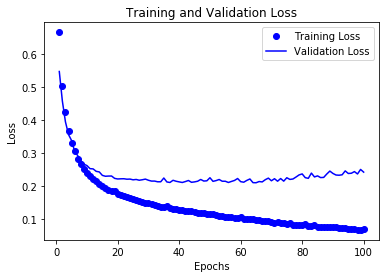

In [20]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the training and Validation accuracy as function of epochs

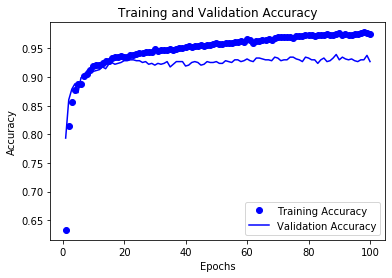

In [21]:
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
results = model.evaluate(test_X, test_Y)
print(results)

1381/1381 [==============================] - 0s 46us/step
[0.1693823969856196, 0.9435191750526428]


#### Comparing the performance with a random classifier

In [28]:
testlabels_copy = np.copy(test_Y)
np.random.shuffle(testlabels_copy)
hits_array = np.array(test_Y) == np.array(testlabels_copy)
print(np.sum(hits_array)/len(test_Y))

0.5220854453294714


#### Testing the performance on a randomly chosen data point in test set

In [29]:
print("True label: "+str(test_Y[6]))
prediction = model.predict(np.array([test_X[6]]))
np.argmax(prediction)

True label: [0]


0